### [NLTK Inaugural]

In [2]:
import nltk
nltk.download() #lookup
# 전체 코퍼스를 한번 다 다운 받으면 오류 안남

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
# import nltk
nltk.download(['brown','inaugural'])

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Jung_a\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\Jung_a\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


True

In [5]:
brown = nltk.corpus.brown

In [6]:
## 전체 카테고리에서 특정 단어들의 빈도수를 한번에 보여주기

#1. tabulate함수에서 modals와 카테고리 연결해주기
# CFD
cfd = nltk.ConditionalFreqDist(
    (genre,word)
    for genre in brown.categories()
    for word in brown.words(categories=genre) #fileids도 쓸 수 있음 ex- words(categories="",fileids="")
)

# 모든 장르에서 modal의 빈도수
modals = ['can','could','would','will','might','may']
cfd.tabulate(conditions=brown.categories(),samples=modals)
# brown.categories() : all 장르
# word.lower()을 안했기 때문에 아래랑 값이 다름

                  can could would  will might   may 
      adventure    46   151   191    50    58     5 
 belles_lettres   246   213   392   236   113   207 
      editorial   121    56   180   233    39    74 
        fiction    37   166   287    52    44     8 
     government   117    38   120   244    13   153 
        hobbies   268    58    78   264    22   131 
          humor    16    30    56    13     8     8 
        learned   365   159   319   340   128   324 
           lore   170   141   186   175    49   165 
        mystery    42   141   186    20    57    13 
           news    93    86   244   389    38    66 
       religion    82    59    68    71    12    78 
        reviews    45    40    47    58    26    45 
        romance    74   193   244    43    51    11 
science_fiction    16    49    79    16    12     4 


In [8]:
#2. cfd에서 한번에 연결하기

# modals의 빈도수가 포함된 cfd (word -> modal_verb)
cfd1 = nltk.ConditionalFreqDist(
    (genre, modal)
    for genre in brown.categories()
    for modal in ['can','could','would','will','might','may']
    
    for word in brown.words(categories=genre) # genre와 modal을 이어주기 위해
        if word.lower() == modal
)
cfd1.tabulate()


                  can could   may might  will would 
      adventure    48   154     7    59    51   194 
 belles_lettres   249   216   221   113   246   397 
      editorial   124    57    79    39   235   185 
        fiction    39   168    10    44    56   291 
     government   119    38   179    13   244   120 
        hobbies   276    59   143    22   269    83 
          humor    17    33     8     8    13    56 
        learned   367   159   336   128   340   321 
           lore   170   142   170    50   178   188 
        mystery    45   145    15    57    25   189 
           news    94    87    93    38   389   246 
       religion    84    59    79    12    72    69 
        reviews    45    40    47    26    61    48 
        romance    79   195    11    51    49   247 
science_fiction    16    49     4    12    17    80 


### [Inaugural]
 - 연설문 코퍼스
 

In [9]:
inaugural = nltk.corpus.inaugural

In [10]:
inaugural.fileids() # 연도-대통령 이름.text

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [ ]:
## 아메리카와 시티즌이 년도별로 얼마나 쓰였는지 보기

# ['america','citizen'] 빈도수를 cfd로 만들어라. == 보다는 다르게 가는 게 좋다. 왜냐면 citizens를 포함해야해서. citizen's도.
cfd1 = nltk.ConditionalFreqDist(
    (file,inau)
    for file in inaugural.fileids()
    for inau in ['america','citizen'] # 소문자인 이유가 있음
    
    for word in inaugural.words(fileids=file)
        if word.lower() == inau
)
cfd1.tabulate() #결과를 표로 만들어주는 함수 (테이블을 만들어줌)

In [15]:
cfd2 = nltk.ConditionalFreqDist(
    (target_word,fileid[:-4]) #.txt를 없애기 위해서 [:-4] 해줌
    #(fileid[:-4],target_word) # 위치를 바꾸면 x축, y축이 바뀐다.
    for fileid in inaugural.fileids()
    for target_word in ['america','citizen']
    
    for word in inaugural.words(fileids=fileid)
        # if word.lower() == target_word 
        # if target_word in word.lower()
        if word.lower().startswith(target_word)
)
cfd2.tabulate()

        1789-Washington 1793-Washington      1797-Adams  1801-Jefferson  1805-Jefferson    1809-Madison    1813-Madison     1817-Monroe     1821-Monroe      1825-Adams    1829-Jackson    1833-Jackson   1837-VanBuren   1841-Harrison       1845-Polk     1849-Taylor     1853-Pierce   1857-Buchanan    1861-Lincoln    1865-Lincoln      1869-Grant      1873-Grant      1877-Hayes   1881-Garfield  1885-Cleveland   1889-Harrison  1893-Cleveland   1897-McKinley   1901-McKinley  1905-Roosevelt       1909-Taft     1917-Wilson    1921-Harding   1925-Coolidge     1929-Hoover  1933-Roosevelt  1937-Roosevelt  1941-Roosevelt  1945-Roosevelt     1949-Truman 1953-Eisenhower 1957-Eisenhower    1961-Kennedy    1965-Johnson      1969-Nixon      1973-Nixon     1977-Carter     1981-Reagan     1985-Reagan       1989-Bush    1993-Clinton    1997-Clinton       2001-Bush       2005-Bush      2009-Obama      2013-Obama      2017-Trump      2021-Biden 
america               2               1               8        

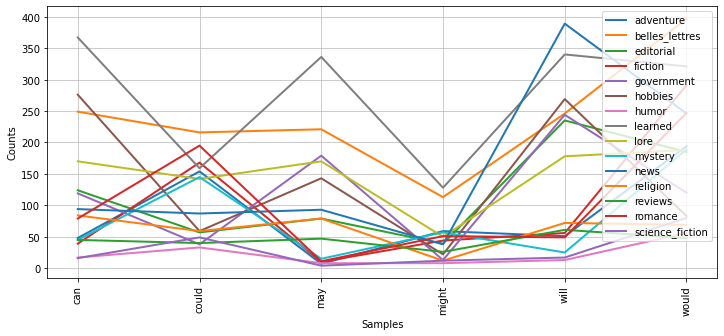

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [18]:
!pip install matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
cfd1.plot()

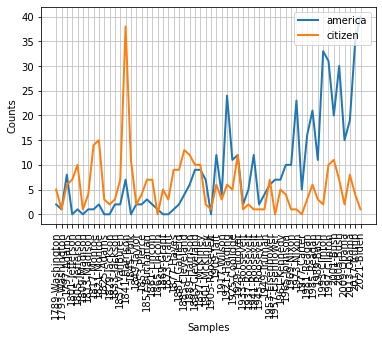

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [16]:
cfd2.plot() #(그림을 그려줌)

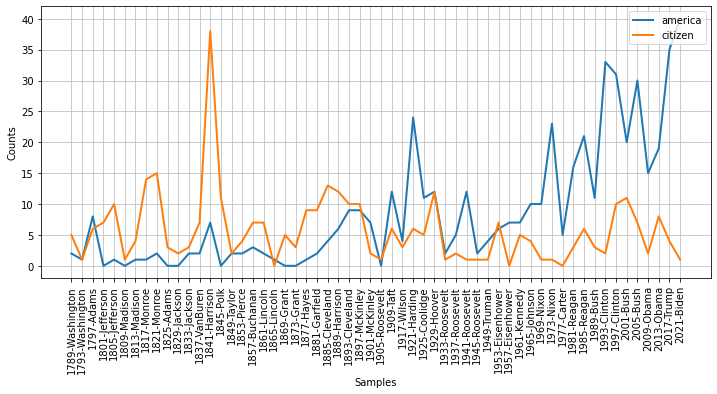

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [19]:
# 각 년도별로 시티즌, 아메리카 얼마나 썼는지 보여줌
# 즉, 각 장르(파일 아이디)별로 내가 원하는 단어의 빈도수를 볼 수 있음
plt.figure(figsize=(12,5)) 
cfd2.plot()

### [Tuple & List]
- 튜플: 불변객체
- 리스트: 가변 객체

In [20]:
# 생성
emptyT = () 
emptyT = tuple()

emptyL = []
emptyL = list()

emptyT, emptyL

((), [])

In [21]:
# 1.1 요소가 여러개일 때
# alphabetT = ('a','b')
alphabetT = 'a','b' #괄호 없이도 가능. 편해서 많이 쓴다
alphabetT

('a', 'b')

In [ ]:
alphabetL = ['a','b']

In [23]:
# 1.2 요소가 1개일 때, 주의! #################주의주의주의################
alphaT = ('a')
type(alphaT)
# 튜플일 줄 알았는데? str임. 

str

In [24]:
# str하나를 튜플로 넣고 싶다면! 쉼표를 넣어라.
# alphaT = 'b',
alphaT = ('b',)
type(alphaT)

tuple

- packing: 한 변수에 여러 데이터 할당
    - list, tuple 자체가 패킹. 
    - a = [1,2,3] 하나에 여러개 뭉치를 할당
- unpacking: 한 변수에 여러 데이터가 들어 있을 때 여러 변수에 나누는 것
    - a = 'k', b ='i',c ='m'

In [25]:
a,b,c = 'kim' #unpacking
a,b,c

('k', 'i', 'm')

In [ ]:
# 값 교환하기
pwd = 'abcd'
userid = 'sky'
"""
temp1 = userid
temp2 = pwd
pwd = temp1
userid = temp2 

"""

In [ ]:
# 값 교환하는 다른 방법!
pwd, userid = userid, pwd
pwd, userid

In [27]:
# 튜플끼리 연산
('a',) + (1,2) # >>> ('a', 1, 2)
(1,2) * 3 # >>> (1, 2, 1, 2, 1, 2)

(1, 2, 1, 2, 1, 2)

In [28]:
# 어떻게 튜플이 연산이 가능한가?
x = ('a',)
y = (1,2)
x+y

('a', 1, 2)

In [29]:
id(x), id(x+y) #x값은 변하지 않았음. 즉, x+y라는 새로운 변수에 할당이 된 것

(1837856672256, 1837853308288)

In [30]:
# 퓨틀끼리 비교도 가능하다
x = 1,2
y = 1,6

x < y # 두번째 인자에서 비교

True

In [31]:
# 튜플 순회
for i in x:
    print(x)

(1, 2)
(1, 2)


In [32]:
#1.  lsit comprehension
[i for i in x] # 제일 많이 사용

[1, 2]

In [34]:
#2 tuple 컴프리헨션은 없다. 그러나 튜플로 변경할 순 있음.
tuple([i for i in x]) 

(1, 2)

In [33]:
#3. 리스트를 튜플로 변경하는 방법
*[i for i in x], #그러나 느림 굳이 튜플로 변경할 필요는 없음

(1, 2)

In [39]:
# str을 튜플로 형 변환시 주의 : tuple('dog') vs ('dog',) vs list('dog')
dog = 'dog'
tuple(dog) 

('d', 'o', 'g')

In [36]:
# 결과: 'str'이 튜플로 들어감
(dog,)

('dog',)

In [43]:
list(('dog',))

['dog']

In [44]:
list('dog')

['d', 'o', 'g']

In [ ]:
# slicing
dogT = tuple(dog) #튜플도 슬라이싱 가능
dogT[0]

[정리]
- tuple 장점
    - 변하지 않는 데이터 시퀀스를 만들 수 있다. 
    - 다른 사람들이 변경할 수 없음. 타인의 접근 막음
        - blue=1,white=2,..코드를 만들었을 때 많이 사용
    - 메모리 사용 적다.

- list 장점
    - 튜플 장점 필요업을 때 전부 리스트 사용
    - 데이터를 순차적으로 파악할 때
    - 중복 데이터 쓸 수 있음 vs set / tuple 도 중복 가능
    

### [리스트의 유용한 함수들]
- 변경, 삭제, 추가
- 리스트컴프리 업그레이드

In [45]:
list('abcd')

['a', 'b', 'c', 'd']

In [46]:
num = list(range(5))
num

[0, 1, 2, 3, 4]

In [47]:
# 추가
num.append(6) # 맨 뒤에 요소 1개를 추가, 여러개 한번에 추가 X
num

[0, 1, 2, 3, 4, 6]

In [48]:
# insert(index,item)
num.insert(0,8)
num

[8, 0, 1, 2, 3, 4, 6]

In [49]:
# 여러개 추가하고 싶을 땐 extend() / 인자를 리스트로 가져가야함 
# 코드 만질 때 주의해야함. 어팬드할때마다 계속 추가됨
x = [6,6,6]
num.extend(x)
num 

[8, 0, 1, 2, 3, 4, 6, 6, 6, 6]

In [50]:
num.append(x) #리스트를 append하면 리스트로 들어간다! / append != extend
num

[8, 0, 1, 2, 3, 4, 6, 6, 6, 6, [6, 6, 6]]

In [95]:
# extend와 같은 방법
num += x # 튜플은 안된다
num

[4, 3, 2, 1, 0, 6, 6, 6]

In [51]:
# offset
num[0] = 9
num

[9, 0, 1, 2, 3, 4, 6, 6, 6, 6, [6, 6, 6]]

In [52]:
# slice
num[:3] = 2,2,2
num

[2, 2, 2, 2, 3, 4, 6, 6, 6, 6, [6, 6, 6]]

In [54]:
num[:3] = ('cat',) #앞에서 3개가 없어지고 'cat'하나만 들어감
num

['cat', 2, 3, 4, 6, 6, 6, 6, [6, 6, 6]]

In [55]:
num[:3] = 'cat' #언팩킹이 되어서 들어간다는것 주의
num

['c', 'a', 't', 4, 6, 6, 6, 6, [6, 6, 6]]

In [56]:
# 삭제
del num[:3] #특정 offset 지우기
num

[4, 6, 6, 6, 6, [6, 6, 6]]

In [60]:
# remove(value): 특정 값을 지우기
# 보니까 이게 한번에 다 지워지는게 아니라 remove 한번에 하나씩 지워지네 (45m)
num.remove(6)
num

[4, 6, [6, 6, 6]]

In [61]:
# pop(index) 기본값 = -1 / 맨 뒤에 하나가 제거됨
num.pop()
num

[4, 6]

In [62]:
num.pop(0)# 인덱스가 제거
num

[6]

In [63]:
num.clear() # 다 지우기
num

[]

In [64]:
# 인덱스
num = list(range(5))
num.index(4)

4

In [65]:
0 in num

True

In [ ]:
# 정렬: sort(), sorted()
sorted(num,reverse=True) #변한 값만 복사해서 출력

In [66]:
num

[0, 1, 2, 3, 4]

In [68]:
num.sort(reverse=True) # 리스트.sort()/ 값을 할당하지 않아도 됨

In [69]:
num

[4, 3, 2, 1, 0]

In [ ]:
# reverse(), reversed() <---> sort(),serted() 관계와 비슷
num.reverse()
reversed(num) 

In [70]:
# 할당
a = list(range(1,5))
a

[1, 2, 3, 4]

In [71]:
b = a # '='는 같은 메모리 주소를 참조하는 것임
b[0] = 6
a,b
# 둘다 변한다.

([6, 2, 3, 4], [6, 2, 3, 4])

In [72]:
# 메모리 주소
id(a),id(b)

(1837857887680, 1837857887680)

In [74]:
# shallow copy: 참조하지 않고 새로운 객체에 할당하는 방법. 얉은 복사
c = a.copy()
d = list(a)
e = a[:]
id(a),id(c),id(d),id(e) #메모리 주소가 다 다름

(1837857887680, 1837857037248, 1837857877824, 1837857889216)

In [73]:
# 딥카피가 아니면 어떤 일이 일어나는가
a.append([1,2,3])
a

[6, 2, 3, 4, [1, 2, 3]]

In [75]:
f = a.copy()
id(a), id(f)

(1837857887680, 1837857875264)

In [76]:
f[-1][0] = 9
a,f #a에도 추가됨!! 메모리 주소가 다름에도 불구하고, 중첩된 리스트 요소가 같이 바뀐다.

([6, 2, 3, 4, [9, 2, 3]], [6, 2, 3, 4, [9, 2, 3]])

In [77]:
# deepcopy: 깊은 복사, 하위에 중첩된 리스트 요소가 안 바뀌도록!!
import copy
g = copy.deepcopy(a)
g

[6, 2, 3, 4, [9, 2, 3]]

In [78]:
g[-1][0] = 10 # copy를 해도 a의 하위 집합이 변하지 않음!!
a,g

([6, 2, 3, 4, [9, 2, 3]], [6, 2, 3, 4, [10, 2, 3]])

In [79]:
# 리스트 순회: zip, enumerate
name = ['kaa','royce','phil']
age = [77,44,54,99] #더 짧은걸 기준으로 끝난다. age가 하나 더 많지만 99출력 X

# (name, age)
for item1, item2 in zip(name,age):
    print((item1,item2))

('kaa', 77)
('royce', 44)
('phil', 54)


In [81]:
for item1 in name:
    for item2 in age:
        print((item1,item2))

('kaa', 77)
('kaa', 44)
('kaa', 54)
('kaa', 99)
('royce', 77)
('royce', 44)
('royce', 54)
('royce', 99)
('phil', 77)
('phil', 44)
('phil', 54)
('phil', 99)


In [82]:
list(zip(name,age))

[('kaa', 77), ('royce', 44), ('phil', 54)]

In [83]:
# 리스트+인덱스: enumerate
for idx, item in enumerate(name):
    print(idx,item)

0 kaa
1 royce
2 phil


In [84]:
# 리스트 컴프리로?
[(idx,item) for idx, item in enumerate(name)]

[(0, 'kaa'), (1, 'royce'), (2, 'phil')]

In [87]:
# [('kaa', 77), ('royce', 44), ('phil', 54)] 를 리스트 컴프리로 만들면?
[(item1,item2) for item1 in name for item2 in age]
# 이렇게 하면 안됨!

[('kaa', 77),
 ('kaa', 44),
 ('kaa', 54),
 ('kaa', 99),
 ('royce', 77),
 ('royce', 44),
 ('royce', 54),
 ('royce', 99),
 ('phil', 77),
 ('phil', 44),
 ('phil', 54),
 ('phil', 99)]

In [86]:
# 정답
[(item1,item2) for item1,item2 in zip(name,age)]
# [ items for items in zip(name,age)] 도 가능! 다만, 아이템 요소 하나 하나를 수정할순 없음

[('kaa', 77), ('royce', 44), ('phil', 54)]

name = ['kaa','royce','phil']
age = [77,44,54,99] #더 짧은걸 기준으로 끝난다.

# (name, age)
for item1, item2 in zip(name,age):
    print((item1,item2))

In [88]:
[(i,j) for i,j in zip(name,age)]

[('kaa', 77), ('royce', 44), ('phil', 54)]

In [89]:
# name, age를 이용해서 리스트를 만드는데 (이름,나이) for문 사용 (리컴 사용 X)

newList = []
for i,j in zip(name,age):
    newList.append((i,j))
print(newList)

[('kaa', 77), ('royce', 44), ('phil', 54)]


#### [(i,j) for i,j in zip(name,age)] 에 대해서

In [90]:
#1. for문을  리스트 컴프리로 바꾸기
for i in name:
    for j in age:
        print(i,j)

kaa 77
kaa 44
kaa 54
kaa 99
royce 77
royce 44
royce 54
royce 99
phil 77
phil 44
phil 54
phil 99


In [ ]:
#1. 풀이
[(i,j) for i in name for j in age]

In [97]:
#2. [i,j] 리스트의 리스트로 바꿔보기 (리.컴)

""" output 

[[(kate,77),(kate,44),(kate,54)],[] ..]

"""
output = []
for i in name:
    empty = []
    for j in age:
        print(i,j)
        empty.append((i,j))
    output.append(empty)
print()
print(output)

kaa 77
kaa 44
kaa 54
kaa 99
royce 77
royce 44
royce 54
royce 99
phil 77
phil 44
phil 54
phil 99

[[('kaa', 77), ('kaa', 44), ('kaa', 54), ('kaa', 99)], [('royce', 77), ('royce', 44), ('royce', 54), ('royce', 99)], [('phil', 77), ('phil', 44), ('phil', 54), ('phil', 99)]]


In [94]:
[[(i,j) for j in age] for i in name]

[[('kaa', 77), ('kaa', 44), ('kaa', 54), ('kaa', 99)],
 [('royce', 77), ('royce', 44), ('royce', 54), ('royce', 99)],
 [('phil', 77), ('phil', 44), ('phil', 54), ('phil', 99)]]

In [ ]:
#2. 풀이
[[(i,j) for j in age] for i in name] 
# age가 왜 안이고 name이 왜 밖인지?
# >>> 저걸 이중 for문으로 작성한다 치면, name 한번 돌때 age가 다 출력되야 하므로 name이 밖, age가 안.
"""
for name:
    for age 
"""

In [99]:
sentence = "do not judge a book by its cover"

# (대문자, 첫글자 대문자 타이틀, 글자 수) 리스트로 만들기

In [100]:
# 내 풀이
[(word.upper(),word.title(),len(word)) for word in sentence.split()]

[('DO', 'Do', 2),
 ('NOT', 'Not', 3),
 ('JUDGE', 'Judge', 5),
 ('A', 'A', 1),
 ('BOOK', 'Book', 4),
 ('BY', 'By', 2),
 ('ITS', 'Its', 3),
 ('COVER', 'Cover', 5)]

In [102]:
text = [
    ['Sunja','said','goodnight','to','her','mother'],
    ['was','no','in','no','longer','in','Busan']
]
text

[['Sunja', 'said', 'goodnight', 'to', 'her', 'mother'],
 ['was', 'no', 'in', 'no', 'longer', 'in', 'Busan']]

In [107]:
#1. 문장마다 스트링으로 변환해서 리스트로 변환
# ['문장1','문장2']
[' '.join(sent) for sent in text]

['Sunja said goodnight to her mother', 'was no in no longer in Busan']

In [ ]:
#2. 전체를 스트링으로 변환
    # '문장1 문장2'

In [109]:
# 2 내 풀이
(" ".join(text[0]) + " ".join(text[1]))
# 2 답
' '.join([' '.join(sent) for sent in text])

'Sunja said goodnight to her mother was no in no longer in Busan'

In [ ]:
#3. 전체 단어 리스트 가져오기
# [sunja, said, ..]

In [112]:
#3. 내 풀이
[word for word in (" ".join(text[0]) + " ".join(text[1])).split()]

['Sunja',
 'said',
 'goodnight',
 'to',
 'her',
 'motherwas',
 'no',
 'in',
 'no',
 'longer',
 'in',
 'Busan']

In [113]:
# 3번 답
# 이거 왜 생각못했을까!! ㅠㅠ ㅋㅋ
[word for sent in text for word in sent]

['Sunja',
 'said',
 'goodnight',
 'to',
 'her',
 'mother',
 'was',
 'no',
 'in',
 'no',
 'longer',
 'in',
 'Busan']

In [114]:
# if - > else
[i for i in range(10)] #짝수면 가져오고 홀수는 = '홀수'

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
[i for i in range(10) if i %2 == 0 else "홀수"] # 이렇게 하면 안됨

In [115]:
[i if i%2 ==0 else "홀수" for i in range(10)] # 조건문을 앞으로 가져와야 함

[0, '홀수', 2, '홀수', 4, '홀수', 6, '홀수', 8, '홀수']

In [ ]:
# 과제: brown 정제하기

In [ ]:
import nltk
nltk.download('brown') 
brown = nltk.corpus.brown

In [ ]:
[f for f in inaugural.fileids() if '' in f]

In [ ]:
inaugural.raw('2021-Biden.txt')

In [ ]:
brown.raw(categories='romance')[:500]

In [ ]:
# brown.raw(categories='romance')[:5000] 으로 5000만 불러오기
# ex) [['They','neither','liked','nor'],['다음 문장']]
# 정제를 해서
# 정규식 x. 배운것만
# 문장 분절 -> 단어 분절 
# 불필요한 것들 제거하기
 ## 문장 부호
 ## 품사 pos 제거 (/cc 이런거)
## 's , 'nt 도 여력이 되면  처리하기
(she's -> she, 's)
(don't -> do, 'nt)
('fly-dotted' -> fly,dotted)
# 모든 품사를 다 손으로 쳐야하는 하드 코딩 하지 마라